Clase Escena

In [ ]:
import math
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.patches import Circle

class Escena:
    def __init__(self):
        """Inicializa la escena con valores predeterminados."""
        self.radio_circunferencia = 0
        self.color_circunferencia = 'blue'
        self.posicion_punto = [0, 0]
        self.color_punto = 'red'
        self.fig = None
        self.ax = None

    def crear_escena(self, radio=5, color_circunferencia='blue', color_punto='red'):
        """
        Crea una instancia de una escena con una circunferencia y un punto superpuesto.

        Parámetros:
        - radio: Tamaño de la circunferencia
        - color_circunferencia: Color de la circunferencia
        - color_punto: Color del punto

        Retorna:
        - self: La instancia de la escena
        """
        self.radio_circunferencia = radio
        self.color_circunferencia = color_circunferencia
        self.color_punto = color_punto
        self.posicion_punto = [self.radio_circunferencia, 0]
        return self

    def cambiar_escena(self, radio=None, color_circunferencia=None, color_punto=None):
        """
        Cambia los parámetros del objeto escena.

        Parámetros:
        - radio: Nuevo tamaño de la circunferencia
        - color_circunferencia: Nuevo color de la circunferencia
        - color_punto: Nuevo color del punto
        """
        if radio is not None:
            self.radio_circunferencia = radio
        if color_circunferencia is not None:
            self.color_circunferencia = color_circunferencia
        if color_punto is not None:
            self.color_punto = color_punto

    def dibujar_escena(self):
        """
        Genera una representación gráfica de la escena.
        """
        self.fig, self.ax = plt.subplots(figsize=(8, 8))

        # Dibujar la circunferencia
        circunferencia = Circle((0, 0), self.radio_circunferencia,
                               fill=False, color=self.color_circunferencia, linewidth=2)
        self.ax.add_patch(circunferencia)

        # Dibujar el punto
        self.ax.plot(self.posicion_punto[0], self.posicion_punto[1], 'o',
                    color=self.color_punto, markersize=10)

        # Configurar ejes
        limite = self.radio_circunferencia * 1.2
        self.ax.set_xlim(-limite, limite)
        self.ax.set_ylim(-limite, limite)
        self.ax.set_aspect('equal')
        self.ax.grid(True)
        self.ax.set_title('Escena 2D: Circunferencia y Punto')

        plt.show()

    def desplazar_puntos(self, valor, direccion):
        """
        Realiza un desplazamiento del punto en la dirección especificada.

        Parámetros:
        - valor: Magnitud del desplazamiento
        - direccion: Dirección del desplazamiento ('derecha', 'izquierda', 'arriba', 'abajo')
        """
        if direccion.lower() == 'derecha':
            self.posicion_punto[0] += valor
        elif direccion.lower() == 'izquierda':
            self.posicion_punto[0] -= valor
        elif direccion.lower() == 'arriba':
            self.posicion_punto[1] += valor
        elif direccion.lower() == 'abajo':
            self.posicion_punto[1] -= valor
        else:
            print("Dirección no válida. Use: 'derecha', 'izquierda', 'arriba', 'abajo'.")

    def simular(self, velocidad, direccion, duracion=5):
        """
        Genera una animación del desplazamiento del punto.

        Parámetros:
        - velocidad: Velocidad del desplazamiento (unidades por segundo)
        - direccion: Dirección del desplazamiento ('derecha', 'izquierda', 'arriba', 'abajo')
        - duracion: Duración de la animación en segundos (por defecto 5)
        """
        self.fig, self.ax = plt.subplots(figsize=(8, 8))

        # Dibujar la circunferencia
        circunferencia = Circle((0, 0), self.radio_circunferencia,
                               fill=False, color=self.color_circunferencia, linewidth=2)
        self.ax.add_patch(circunferencia)

        # Punto a animar
        punto, = self.ax.plot([], [], 'o', color=self.color_punto, markersize=10)

        # Configurar ejes
        limite = self.radio_circunferencia * 1.2
        self.ax.set_xlim(-limite, limite)
        self.ax.set_ylim(-limite, limite)
        self.ax.set_aspect('equal')
        self.ax.grid(True)
        self.ax.set_title(f'Animación: Punto moviéndose hacia {direccion}')

        # Número de frames
        frames = 100

        # Función de inicialización
        def init():
            punto.set_data([], [])
            return punto,

        # Función de animación
        def animate(i):
            # Posición inicial
            pos_x, pos_y = self.posicion_punto

            # Calcular desplazamiento según dirección
            desplazamiento = (velocidad * duracion / frames)

            if direccion.lower() == 'derecha':
                pos_x += desplazamiento * i
            elif direccion.lower() == 'izquierda':
                pos_x -= desplazamiento * i
            elif direccion.lower() == 'arriba':
                pos_y += desplazamiento * i
            elif direccion.lower() == 'abajo':
                pos_y -= desplazamiento * i

            punto.set_data([pos_x], [pos_y])
            return punto,

        # Crear animación
        ani = animation.FuncAnimation(self.fig, animate, frames=frames,
                                     init_func=init, blit=True, interval=duracion*1000/frames)

        plt.show()

        # Actualizar la posición final del punto
        desplazamiento_total = velocidad * duracion
        if direccion.lower() == 'derecha':
            self.posicion_punto[0] += desplazamiento_total
        elif direccion.lower() == 'izquierda':
            self.posicion_punto[0] -= desplazamiento_total
        elif direccion.lower() == 'arriba':
            self.posicion_punto[1] += desplazamiento_total
        elif direccion.lower() == 'abajo':
            self.posicion_punto[1] -= desplazamiento_total

    def escalar_punto(self, factor_escala):
        """
        Escala la posición del punto por un factor dado.

        Parámetros:
        - factor_escala: Factor de escala (puede ser un número positivo o negativo).
        """
        self.posicion_punto[0] *= factor_escala
        self.posicion_punto[1] *= factor_escala

    def calcular_norma_punto(self):
        """
        Calcula la norma (magnitud) del vector posición del punto.

        Retorna:
        - norma: La magnitud del vector posición.
        """
        return math.sqrt(self.posicion_punto[0]**2 + self.posicion_punto[1]**2)

    def calcular_producto_interno(self, otro_punto):
        """
        Calcula el producto interno entre el punto actual y otro punto.

        Parámetros:
        - otro_punto: Lista con las coordenadas [x, y] del otro punto.

        Retorna:
        - producto_interno: El producto interno entre los dos puntos.
        """
        return self.posicion_punto[0] * otro_punto[0] + self.posicion_punto[1] * otro_punto[1]

    def rotar_punto(self, angulo):
        """
        Rota el punto alrededor del origen por un ángulo dado.

        Parámetros:
        - angulo: Ángulo de rotación en grados.
        """
        theta = math.radians(angulo)
        x, y = self.posicion_punto
        x_nuevo = x * math.cos(theta) - y * math.sin(theta)
        y_nuevo = x * math.sin(theta) + y * math.cos(theta)
        self.posicion_punto = [x_nuevo, y_nuevo]


Ejecución de los nuevos metodos

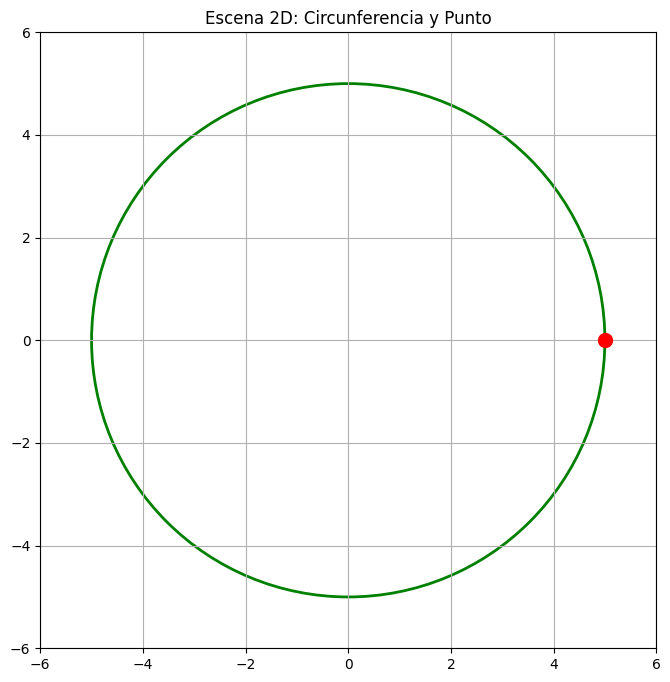

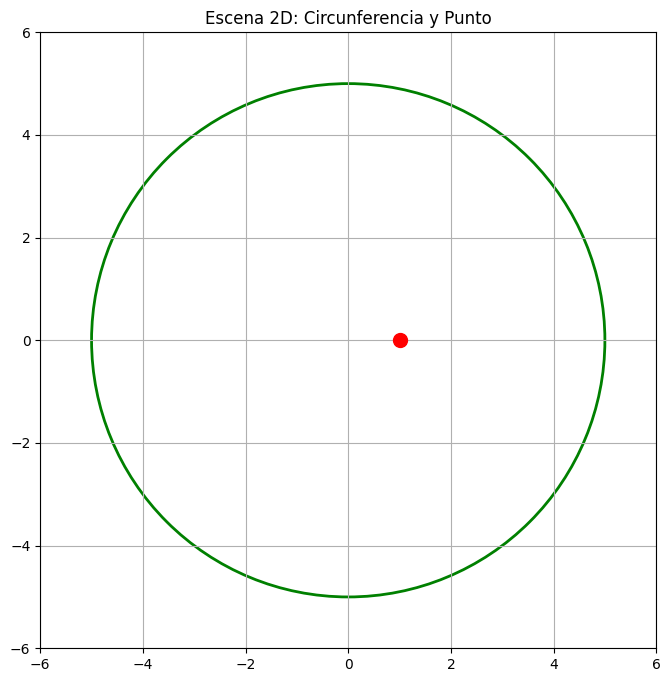

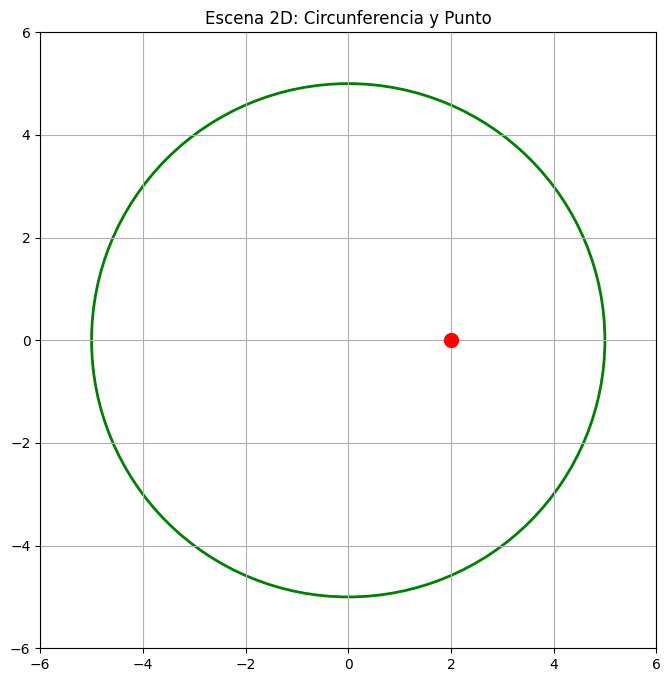

Norma del punto: 2.0
Producto interno con [3, 4]: 6


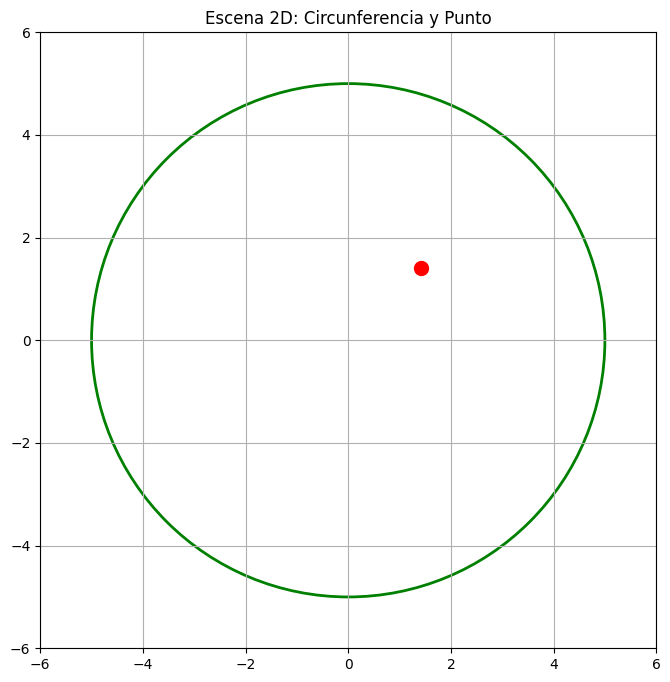

In [5]:
mi_escena = Escena().crear_escena(radio=5, color_circunferencia='green', color_punto='red')

# Dibujar la escena
mi_escena.dibujar_escena()

# Mover el punto hacia la izquierda
mi_escena.desplazar_puntos(4, 'izquierda')
mi_escena.dibujar_escena()

# Escalar el punto
mi_escena.escalar_punto(2)
mi_escena.dibujar_escena()

# Calcular la norma del punto
norma = mi_escena.calcular_norma_punto()
print(f"Norma del punto: {norma}")

# Calcular el producto interno con otro punto
otro_punto = [3, 4]
producto_interno = mi_escena.calcular_producto_interno(otro_punto)
print(f"Producto interno con [3, 4]: {producto_interno}")

# Rotar el punto 45 grados
mi_escena.rotar_punto(45)
mi_escena.dibujar_escena()